<a href="https://colab.research.google.com/github/Highashikata/Data-Science---Customer-Segmentation-Using-K-Means/blob/main/Data_Science_Customer_Segmentation_Using_K_Means_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation**
<p>In this project we have a Customer DataSet as an inoput, and through this project we will be creating a Segementation with customers who behave the same and we will put them into clusters.</p>

<p>After that we will be deploying our results into a Power BI report for business uses.</p>

#### **Step 1 : Importing Useful libraries**


In [ ]:
# Packages
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
# Load the Data into Google Colab
from google.colab import files
uploaded = files.upload()

Saving Customers_Raw_Data.xlsx to Customers_Raw_Data.xlsx


In [82]:
# Reading the Data With Pandas
Raw_Data = pd.read_excel("Customers_Raw_Data.xlsx")

# Viewing the First 5 rows of the DataSet & Its Shape
display("The Shape of The DataSet is {}".format(Raw_Data.shape), Raw_Data.head(10))

'The Shape of The DataSet is (11852, 19)'

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
5,6,65 or older,Male,AL7 9AJ,Welwyn Hatfield,Welwyn Hatfield,51.804196,-0.205381,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,4 hours,Mostly disagree,Neither agree nor disagree,Wooden Bar,Mostly agree,Somewhat Unlikely,Somewhat agree
6,7,50-59,Female,BL1 4NW,Bolton,Bolton West,53.581008,-2.455316,Living with partner,"50,000 to 74,999",4 Times a Year,Up to 1 hour,4 hours,Mostly disagree,Mostly agree,Ice Bar,Mostly agree,Mostly Unlikely,Somewhat agree
7,8,33-39,Male,DA1 9GL,Dartford,Dartford,51.444500,0.209755,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Entirely agree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree
8,9,33-39,Female,BL9 9GP,Bury,Bury North,53.580693,-2.283884,Divorced,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
9,10,33-39,Male,HP22 5ZF,Aylesbury Vale,Aylesbury,51.803390,-0.724381,Married with children,"50,000 to 74,999",3 Times a Year,Up to 1 hour,6 hours plus,Somewhat disagree,Mostly agree,Ice Bar,Neither agree nor disagree,Mostly Unlikely,Somewhat disagree


In [ ]:
pip install pyodbc

In [83]:
# ### Getting The Data Using SQL Server
# import pyodbc as podbc

# connection = podbc.connect("Driver = {SQL Server Native Client 11.0};"
#                            "Server = LAPTOP-A5MD8D65\SQLEXPRESS;"
#                            "Database = CustomerSegmentationDB;"
#                            "Trusted_Connection = yes;")

# # Running SQL Queries we are needing
# SQL_Query = pd.read_sql_query('''SELECT *
# FROM CustomerSegmentationDB.dbo.Customers_Raw_Data''', connection)

# # Connection Close


# # Viz The Data
# SQL_Query.head()

#### Copying The Data for Security

In [84]:
# Copy of the DataSet
df = Raw_Data.copy()

# Checking the New Data
df.head(3)

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree


#### Step 2 : Data Pre-processing

Another useful function provided by pandas is describe() which provides the count, mean, standard deviation, minimum and maximum values and the quantities of the data

In [ ]:
df.describe()

,CUSTOMER,latitude,longitude
count,11852.000000,11852.000000,11852.000000
mean,6533.609349,52.688012,-1.985162
std,3770.698812,3.955425,1.800613
min,1.000000,0.000000,-8.140132
25%,3265.750000,51.503408,-2.981688
50%,6551.500000,52.401214,-1.931265
75%,9818.250000,54.057439,-0.409754
max,13042.000000,58.241169,12.496366


In [ ]:
### Checking for missing data
df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

**Comment : ** By looking at the precedent output, we have a bunch of missing data in the DataSet, in the following fields:
       *'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'*

In [ ]:
df.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

In [ ]:
### Cheking the Data Types
df.info()

### Organize the outputs
print('****'*20)

### OR 
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11852 entries, 0 to 11851
Data columns (total 19 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   CUSTOMER                                                        11852 non-null  int64  
 1   Age                                                             11852 non-null  object 
 2   Gender                                                          11852 non-null  object 
 3   Postcode                                                        11852 non-null  object 
 4   District                                                        11852 non-null  object 
 5   Constituency                                                    11852 non-null  object 
 6   latitude                                                        11852 non-null  float64
 7   longitude                                        

CUSTOMER                                                            int64
Age                                                                object
Gender                                                             object
Postcode                                                           object
District                                                           object
Constituency                                                       object
latitude                                                          float64
longitude                                                         float64
Current_Status                                                     object
Total_Household_Income                                             object
How often you attend Entertaining events in a year?                object
Social_Media                                                       object
How many hours are you willing to travel to attend an event?       object
Do you enjoy adrenaline-rush activitie

**Dropping Duplicate Rows**

In [ ]:
### Checking for the DataSet shape before removing the Data
print("The Shape of the Data Before removing duplicate rows is {}".format(df.shape))

### The Code to remove the duplicate rows
duplicate_rows_df = df[df.duplicated()]

### Displaying the Duplicate rows DataFrame
display("The Shape of the Duplicate Rows DataFrame is {}".format(duplicate_rows_df.shape))

The Shape of the Data Before removing duplicate rows is (11852, 19)


'The Shape of the Duplicate Rows DataFrame is (0, 19)'

**Comment:** So the DataFrame doesn't contain any duplicate rows.
BAAM!!

In [67]:
### Data Pre-processing
## Determining the Unique Values in the Dataset

for column in df:
  if len(df[column].unique()) < 11:
    print('The Number of Values for the Feature {} : {} ---- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, len(df[column].unique())))



The Number of values for the Feature CUSTOMER : 11847
The Number of values for the Feature Age : 14
The Number of Values for the Feature Gender : ['Female' 'Male'] ---- 2
The Number of values for the Feature Postcode : 11785
The Number of values for the Feature District : 221
The Number of values for the Feature Constituency : 355
The Number of values for the Feature latitude : 10731
The Number of values for the Feature longitude : 10752
The Number of Values for the Feature Current_Status : ['Married with children' 'Married without children' 'Living with partner'
 'Divorced' 'Single, never married' 'Separated' 'Widowed' 'Step parent'] ---- 8
The Number of Values for the Feature Total_Household_Income : ['50,000 to 74,999' '35,000 to 49,999' '75,000 to 99,999'
 '100,000 to 149,999' '150,000 to 199,999' '200,000 or more' nan
 '20,000 to 34,999' 'Less than 20,000'] ---- 9
The Number of Values for the Feature How often you attend Entertaining events in a year? : ['4 Times a Year' '3 Times 

##### **Finding out Outliers**

Find out Outliers: We know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1–1.5IQR or Q3+1.5IQR are consider as outlier

In [91]:
display(df.latitude.head(), df.longitude.head())

### defining the IQR of the Latitude
Q1_latitude = df.latitude.quantile(.025)
Q3_latitude = df.latitude.quantile(.75)
IQR_Latitude = Q3_latitude - Q1_latitude
lower_limit = Q1_latitude - 1.5*IQR_Latitude
upper_limit = Q3_latitude + 1.5*IQR_Latitude

### Printing the Statistical Values
print("The Max Value", df.latitude.max())
print("The Min Value", df.latitude.min())
print("Q1", Q1_latitude)
print("Q3", Q1_latitude)
print("InterQuartile Range IQR", IQR_Latitude)

0    51.727429
1    51.804482
2    57.692200
3    52.526595
4    51.593979
Name: latitude, dtype: float64

0   -0.183648
1   -0.195898
2   -2.022295
3   -1.822211
4   -0.040803
Name: longitude, dtype: float64

The Max Value 58.24116899999999
The Min Value 0.0
Q1 50.726950949999996
Q3 50.726950949999996
InterQuartile Range IQR 3.3304885499999983


Here is the function which will return outliers values given column

In [99]:
def OutiliersDetection(column):
  outliers = []
  Q1 = column.quantile(.25)
  Q3 = column.quantile(.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 0.25*IQR
  upper_limit = Q3 + 1.5*IQR
  for value in column:
    if value < lower_limit or value > upper_limit:
      outliers.append(value)
  return list(outliers)

# Checking the function with the Latitude column
OutiliersDetection(df.latitude)

print("The Number of rows containing outliers", len(OutiliersDetection(df.latitude)))
print("The Remaining Data Which is not considered as outlier is", len(df.latitude) - len(OutiliersDetection(df.latitude)))

The Number of rows containing outliers 958
The Remaining Data Which is not considered as outlier is 10894


#### **Step 3 : Data Visualization**

##### Check for missing values visually

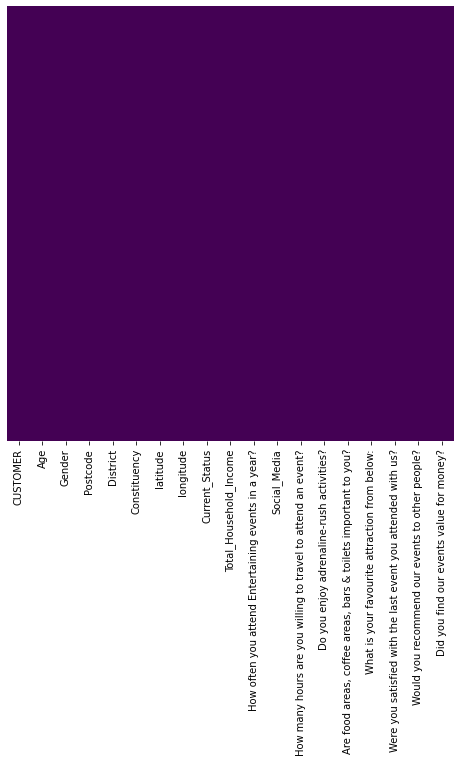

In [104]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis', ax = ax)

**Comment** : From above we can see there is no missing values in the dataset. Incase if there is any, we would have seen figure represented by different color shade on purple background.

##### Categorical Variables Analysis: 
Categorical variable analysis — Now we will understand how data is distributed in categorical feature.

In [105]:
### Defining a new DataFrame with only categorical variables

In [108]:
categorical_df = df.select_dtypes("object")
display(categorical_df.info(), categorical_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11852 entries, 0 to 11851
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Age                                                             11852 non-null  object
 1   Gender                                                          11852 non-null  object
 2   Postcode                                                        11852 non-null  object
 3   District                                                        11852 non-null  object
 4   Constituency                                                    11852 non-null  object
 5   Current_Status                                                  11852 non-null  object
 6   Total_Household_Income                                          11847 non-null  object
 7   How often you attend Entertaining events in a year?       

None

,Age,Gender,Postcode,District,Constituency,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/pyt

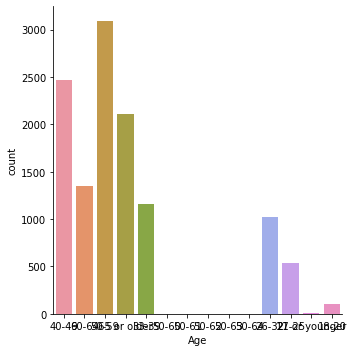

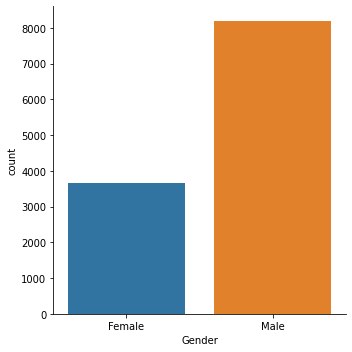

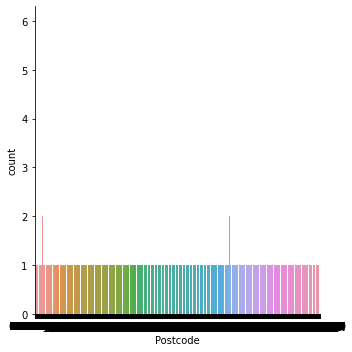

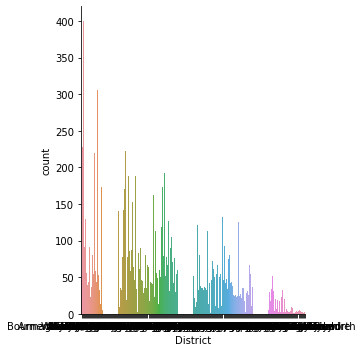

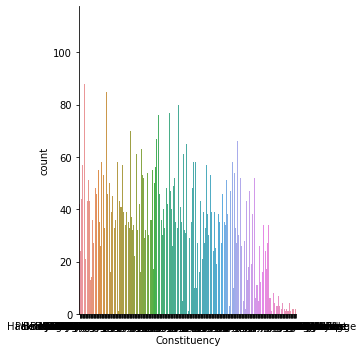

In [115]:
## Checking for The Gender Count
fields = ['Age', 'Gender', 'Postcode', 'District', 'Constituency']
for field in fields:
  sns.factorplot(field, data = categorical_df, kind = 'count')